# Péndulo con punto de suspensión libre

[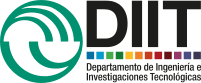](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

> Bibliografía:
>- Sección 5 ($\S 5$) Ejercicio 2  
Mecánica  
Lev Davidovich Landau, y E. M. Lifshitz  
Reverté, 1994

## Enunciado
La partícula de masa \\(m_2\\) pende de una barra rígida de longitud \\(\ell\\) de masa despreciable.
El otro extremo de la misma está engarzada a una barra rígida dispuesta a lo largo del eje \\(\hat{x}\\).
El dispositivo de engarze tiene una  masa \\(m_1\\).

1. Escriba la energía cinética, \\(T\\) y potencial, \\(V\\), en función de las coordenadas generalizadas sugeridas por las figura.
1. Verifique que al fijar la masa \\(m_1\\) recupera las expresiones de \\(T\\) y \\(V\\) de un péndulo ideal.  
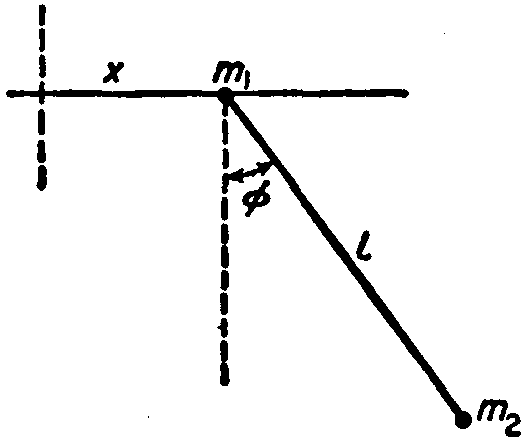

## Coordenadas generalizadas
> Referencia:
> - [Landau](https://mega.nz/file/CQInnIzJ#WenBhiu1wz57v2ulGmgfrlKzgLoNSPh4HBzWYFGh6_4) $\S1$ "Coordenas generalizadas"
> - [Apunte Lanczos](https://github.com/bettachini/UNLaM_MecanicaGeneral/blob/master/apunteLanczos/apunteLanczos.pdf) $\S 2.2$ "Coordenadas generalizadas"


### Coordenadas generalizadas de este sistema
Este sistema de $P=2$ partículas, de masas $m_1$ y $m_2$, debieran gozar de sus 3 **grados de libertad** en un mundo tridimensional.
La descripción de la dinámica de este sistema requiría de $3P= 6$ coordenadas para sus posiciones y también $3P$ velocidades.

Pero a las partículas les imponemos **restricciones que quitan grados de libertad**:
1. El movimiento se limita al plano $\rightarrow$ dos restricciones.
2. La partícula $1$ está engarzada en la corredera horizontal $\rightarrow$ una restricción.
3. La $2$ no tiene más remedio que estar separada en $\ell$ de $1$ $\rightarrow$ otra restricción.

Un total de $K=4$ restricciones, que reducen los grados de libertad del sistema a $3P-K= 2$.
Es decir que solo $2$ coordenadas generalizadas (y sus respectivas derivadas en el tiempo) bastan para  definir la dinámica del sistema.

La expresión $$\boxed{3P-K}$$ permite obtener el número de coordenadas generalizadas que se requieren para modelizar un sistema.  

### Notación
Para describir los $N$ grados de libertad usaremos $q_1, q_2,\dots,q_N$ **coordenadas generalizadas**.
- No necesariamente son las coordenadas en un sistema, e.g. $(\rho,\varphi, \theta)$ en el esférico.
- Pueden ser cualquier magnitud que nos permita determinar posiciones, e.g. una coordenada en el sistema cartesiano puede ser función de estas $x_1= f(q_1, q_2,\dots,q_N)$.

Sabemos que para describir la dinámica de un sistema no alcanza las con posiciones sino que necesitamos también las velocidades.
Así que nos interesarán también las **velocidades generalizadas**: $\dot{q}_1, \dot{q}_2,\dots,\dot{q}_N$.

### Coordenadas generalizadas y sistema cartesiano

Para este primer ejemplo haremos algo muy mecanicista al usar un sistema de coordenadas cartesiano y sus versores.
Usualmente podríamos escribir la velocidad al cuadrado de cada cuerpo con la expresión de la velocidad en los distintos sistemas que conocemos.

La figura que acompaña a este problema nos sugiere dos coordenadas generalizadas.
Ubicar la $m_1$ sobre el eje $x$ permite determinar su posición solo con una, $x$,
$$
\begin{aligned}
\vec{r}_1 
&= x \hat{x}.
\end{aligned}
$$

#### ¿Cómo escribimos esto en un código Python?
Recordemos que Python es un lenguage interactivo por lo podemos ejecutar parte de un programa, revisar y modificar variables y ejecutar luego otras partes.
Esto se desarrolla en una _sesión_ que comienza al iniciar el _intérpete_ interactivo hasta borrar los contenidos de memoria.

Lo primero que vamos a ejecutar en una sesión es el _importar_ las bibliotecas de funciones para mecánica, la parte de la física que nos ocupa en esta asignatura. 

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

Usaremos funciones para definir un marco de referencias en coordenadas cartesianas y las variables pertinentes para la posición de la partícula de masa \\(m_1\\).

In [2]:
# Defino coordenadas generalizadas
N = mech.ReferenceFrame('N') # marco referencial o en coordenadas cartesianas
t = sym.symbols('t') # declaración del tiempo como una variable
x = mech.dynamicsymbols('x') # x cambiara con el tiempo, por tanto es una variable dinámica

__Obs__: en caso que deseemos definir más de una variable dinámica basta sumarla directamente en la línea 4 anterior. Por ejemplo, podemos definir $x_1$ y $x_2$ por medio de
`x1, x2 = mech.dynamicsymbols('x_1, x_2')`

__Obs 2__: En este caso llamamos al marco de referenca "N", sin embargo podemos utilizar cualquier notación que nos resulte cómoda, por ejemplo:
`e = mech.ReferenceFrame('e')`
en este caso entonces utilizaríamos la notación `x_1*(e.x)` para indicar $x_1 \hat{e}_x$

------------------------------------------------



## Resolución del ejercicio

In [3]:
# Importar funciones de mecánica de SymPy.
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [4]:
# Establece sistema de referencia
e = mech.ReferenceFrame('e') # marco referencial o en coordenadas cartesianas

In [5]:
# posición de primer partícula
x = mech.dynamicsymbols('x') # x cambiara con el tiempo, por tanto es una variable dinámica
m1_r = x* e.x # posición de la partícula de masa m1
m1_r

In [6]:
# Defino los parámetros físicos del sistema
g, m1, m2, l = sym.symbols('g, m_1, m_2, \ell', positive=True) # Escribirlos tras el subguión hace que los números aparezcan como subíndices. 

In [7]:
# posición de la segunda partícula
phi = mech.dynamicsymbols('phi')
m2_r = m1_r + l*( sym.sin(phi)* e.x + sym.cos(phi)* (-e.y) )  # y versor apunta hacia arriba
m2_r

In [8]:
def energíaCinéticaPartícula(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Multiplicación de símbolos Sympy (sympy.core.mul.Mul)
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    # velocidad = posición.diff(t, marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* masa* velocidad.dot(velocidad)

In [13]:
# Energía cinética del sistemac
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m2 = energíaCinéticaPartícula(m2, m2_r, e)
T = sym.Eq(sym.Symbol('T'), T_m1 + T_m2 ) 
T

## Energía potencial
Conociendo las fuerzas que dependen de campos (e.g. gravitatorios, electromagnéticos) se determina el potencial a partir de
$$
\vec{F} = - \vec{\nabla} V.
$$

En este problema está presente el campo gravitatorio responsable de la aceleración $\vec{g}= -g \hat{y}$ actuando sobre todas las $m_i$, causando sobre estas la fuerza peso $\vec{P}= m \vec{g}$.

La expresión más sencilla para calcular el potencial gravitatorio es
$$
V = - \vec{P} \cdot \vec{r}
$$

con lo que el potencial del sistema queda
$$
\begin{aligned}
V(\varphi)
&= -\vec{P}_2 \cdot \vec{r}_2 \\
&= - [m_2 (g (- \hat{y} ) ] \cdot (x_2 \hat{x} + y_2 \hat{y}) \\
&= - (- m_2 g\hat{y} ) \cdot ( y_2 \hat{y}) \\
&= (m_2 g) \hat{y} \cdot (-\ell \cos{(\varphi)} ) \hat{y} \\
&= - \ell g m_2 \cos{(\varphi)}.
\end{aligned}
$$

In [10]:
m2_r

In [11]:
# Energía potencial
m1_V = 0
m2_V = - (m2* g* (- e.y)).dot(m2_r)
V = sym.Eq(sym.Symbol('V'), (m1_V + m2_V ) )
V

## Péndulo ideal
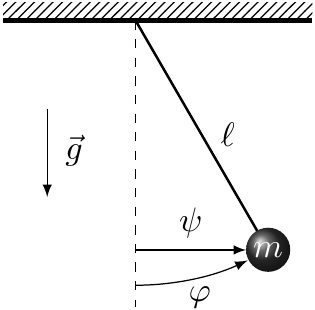

### Energía cinética
Dado que la longitud $\ell$ es constante es conveniente trabajar en coordenadas cilíndricas.
En estas un péndulo rígido e ideal tiene una única componente no nula de su velocidad: la que vá en $\hat{\varphi}$ es decir $\dot{\vec{r}} \cdot \hat{\varphi}= \ell \dot{\varphi}$.
Así
$$
T= \frac{m}{2} \dot{\vec{r}}^2= \frac{m}{2} \ell^2 \dot{\varphi}^2.
$$


En la expresión de la energía cinética del sistema anterior no figura la coordenada generalizada de la $m_1$ que es $x$, la posición de la suspensión

In [14]:
T

Pero si figura la velocidad generalizada $\dot{x}$ que corresponde a esa coordenada.
Si el punto de suspensión estará fijado, evidentemente $\dot{x}$ debe ser $0$.

In [15]:
suspensiónFija_T = T.subs(x.diff(t), 0) # subs: substitución
suspensiónFija_T

En esa expresión se puede obtener un factor común $\ell^2 \dot{\varphi}^2$ dejando entre paréntesis la suma del cuadrado del seno y la del coseno.
Esto como sabemos se simplifica en un $1$.

In [16]:
suspensiónFija_T.simplify()

Ésta es la misma expresión de $T$ que la del péndulo ideal.

### Energía potencial

El potencial gravitatorio es $V(y)= m g y$.
Se establece que para $y=0$ es nulo, es decir $V(y=0)= 0$.
Y dado que que se utilizaron coordenadas cilíndricas $y= -\ell \cos{\varphi}$, entonces
$$
V(\varphi)= -m g \ell \cos{\varphi}.
$$

Como ni $x_1$ ni $\dot{x}_1$ tienen ningún papel en la energía potencial esta es la misma en el péndulo que en este sistema. 

In [17]:
V